<center><h3>Projeto Tera - Precificação de imóveis em Teresina</h3></center>

A precificação de um imóvel é um dos principais critérios a ser levado em consideração na hora da compra de um imóvel, seja ele para moradia ou para investimento, portanto quem está vendendo precisa analisar bem ao formatar o preço já que isso influencia bastante a quantidade de pessoas que terão interesse pelo imóvel e, ou mesmo qual será a linha de crédito utilizada, consequentemente, as oportunidades de iniciar uma negociação. A mesma lógica é aplicada para preços de aluguéis.

Nosso objeto de pesquisa foram os imóveis da cidade de Teresina, localizada ao Nordeste do Brasil. A cidade não tem praia, poucas opções turísticas, mas terrenos tão caros quanto de cidades maiores como Fortaleza e Salvador. Por isso decidimos entender mais o cenário geral e fazer análises de dados para responder às seguintes perguntas:

1. Como é a distribuição de preços de imóveis a venda na cidade?
2. Quais são as zonas mais caras e mais baratas?
**3. Quais características mais influenciam no preço no dataset e por bairro?**

4. Como filtrar imóveis que atendam as necessidades de uma pessoa que deseja comprar para moradia?

Nossa abordagem foi dividida nas seguintes etapas:

* **Obtendo dados :** usando Python, consegui extrair dados de apartamentos alugados de alguns sites holandeses.
* **Limpeza de dados:** geralmente é a parte mais longa de qualquer processo de análise de dados. Nesse caso, era importante limpar os dados para lidar adequadamente com os formatos de dados, remover valores discrepantes etc.
* **EDA:** algumas análises de Análise Exploratória de Dados para visualizar e entender melhor nossos dados.
* **Análise Preditiva :** tentaremos prever preços de aluguel usando um modelo treinado com nosso conjunto de dados.
* **Engenharia de recursos :** nesta etapa, vamos brincar um pouco com o conjunto de dados e adicionar mais recursos para tornar nosso modelo mais preciso.



#  Imports

In [221]:
import numpy as np
import pandas as pd
import warnings

import os

import re

import pickle



from IPython.display import display
pd.options.display.max_columns = None

warnings.filterwarnings( 'ignore' )



In [222]:
os.path.join( os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), 'input')


'C:\\Users\\taiz_\\Documents\\Documents\\Documentos\\CURSOS_Dev\\Tera\\Projeto\\input'

In [165]:
class Precificacao():
    
    def __init__( self ):
        
        #diretórios
        self.INPUT_DIR = os.path.join(os.path.dirname( os.path.dirname( os.path.realpath("__file__"))), 'input')
        self.PARAMS_DIR = os.path.join( os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), 'parametros')
        self.MODEL_DIR = os.path.join( os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), 'model')
        
        
        self.quarto_area_construida_scaler   = pickle.load( open( self.PARAMS_DIR+ '/parametrosquartos_por_areaconstruida.pkl', 'rb') )
        self.preco_por_metro_scaler   = pickle.load( open( self.PARAMS_DIR+ '/parametrospreco_por_metro.pkl', 'rb') )
        self.bairro_por_area_scaler   = pickle.load( open( self.PARAMS_DIR + '/parametrosbairro_por_area.pkl', 'rb') )
        self.bairro_scaler   = pickle.load( open( self.PARAMS_DIR + '/parametrosbairro_scaler.pkl', 'rb') )
        self.banheiros_scaler   = pickle.load( open( self.PARAMS_DIR + '/parametrosbanheiros_scaler.pkl', 'rb') )
        self.vagas_scaler   = pickle.load( open( self.PARAMS_DIR + '/parametrosvagas_scaler.pkl', 'rb') )
        self.model   = pickle.load( open( self.MODEL_DIR + '/model_price.pkl', 'rb') )
        
        
        
    
    #load
    def ler_csv(self, csv):
        df_raw = os.path.join(self.INPUT_DIR, csv)  
        df = pd.read_csv(df_raw, sep=",")
        
        return df
    
    def data_rearrangement( self, df):
    

        # Rearrumando o Bairro que estava em coluna errada, replace Vagas pela mais comum
        df.loc[df.Vagas == 'Morros', 'Bairro' ] = 'Morros'


        df.loc[df.Vagas == 'Ininga', 'Bairro' ] = 'Ininga'
        df.loc[df.Vagas == 'Uruguai', 'Bairro' ] = 'Uruguai'
        df.loc[df.Vagas == 'São Cristóvão', 'Bairro' ] = 'São Cristóvão'
        df.loc[df.Vagas == 'Fátima', 'Bairro' ] = 'Fátima'
        df.loc[df.Vagas == 'Horto', 'Bairro' ] = 'Horto'
        df.loc[df.Vagas == 'Gurupi', 'Bairro' ] = 'Gurupi'
        df.loc[df.Vagas == 'Vale Quem Tem', 'Bairro' ] = 'Vale Quem Tem'
        df.loc[df.Vagas == 'São João', 'Bairro' ] = 'São João'
        df.loc[df.Vagas == 'Jóquei', 'Bairro' ] = 'Jóquei'
        df.loc[df.Vagas == 'Santa Isabel', 'Bairro' ] = 'Santa Isabel'
        df.loc[df.Vagas == 'Itararé', 'Bairro' ] = 'Itararé'
        df.loc[df.Vagas == 'Ilhotas', 'Bairro' ] = 'Ilhotas'
        df.loc[df.Vagas == 'Cristo Rei', 'Bairro' ] = 'Cristo Rei'
        df.loc[df.Vagas == 'Recanto das Palmeiras', 'Bairro' ] = 'Recanto das Palmeiras'
        df.loc[df.Vagas == 'Macaúba', 'Bairro' ] = 'Macaúba'
        df.loc[df.Vagas == 'Tabajaras', 'Bairro' ] = 'Tabajaras'
        df.loc[df.Vagas == 'Santa Maria', 'Bairro' ] = 'Santa Maria'
        df.loc[df.Vagas == 'Piçarra', 'Bairro' ] = 'Piçarra'
        df.loc[df.Vagas == 'Samapi', 'Bairro' ] = 'Samapi'
        df.loc[df.Vagas == 'Saci', 'Bairro' ] = 'Saci'
        df.loc[df.Vagas == 'Noivos', 'Bairro' ] = 'Noivos'
        df.loc[df.Vagas == 'Satélite', 'Bairro' ] = 'Satélite'
        df.loc[df.Vagas == 'Cabral', 'Bairro' ] = 'Cabral'
        df.loc[df.Vagas == 'Novo Uruguai', 'Bairro' ] = 'Novo Uruguai'
        df.loc[df.Vagas == 'Zoobotânico', 'Bairro' ] = 'Zoobotânico'
        df.loc[df.Vagas == 'Mocambinho', 'Bairro' ] = 'Mocambinho'
        df.loc[df.Vagas == 'Planalto', 'Bairro' ] = 'Planalto'
        df.loc[df.Vagas == 'Acarape', 'Bairro' ] = 'Acarape'
        df.loc[df.Vagas == 'Pirajá', 'Bairro' ] = 'Pirajá'
        df.loc[df.Vagas == 'Pedra Mole', 'Bairro' ] = 'Pedra Mole'
        df.loc[df.Vagas == 'Centro', 'Bairro' ] = 'Centro'
        df.loc[df.Vagas == 'Campestre', 'Bairro' ] = 'Campestre'
        df.loc[df.Vagas == 'Água Mineral', 'Bairro' ] = 'Água Mineral'
        df.loc[df.Vagas == 'Vale do Gavião', 'Bairro' ] = 'Vale do Gavião'
        df.loc[df.Vagas == 'Morada do Sol', 'Bairro' ] = 'Morada do Sol'
        df.loc[df.Vagas == 'Cidade Jardim', 'Bairro' ] = 'Cidade Jardim'
        df.loc[df.Vagas == 'Porto do Centro', 'Bairro' ] = 'Porto do Centro'
        df.loc[df.Vagas == 'Colorado', 'Bairro' ] = 'Colorado'
        df.loc[df.Vagas == 'Memorare', 'Bairro' ] = 'Memorare'
        df.loc[df.Vagas == 'São Pedro', 'Bairro' ] = 'São Pedro'
        df.loc[df.Vagas == 'Aeroporto', 'Bairro' ] = 'Aeroporto'

        # 5 ou mais 
        df.loc[df.Vagas == '5 ou mais', 'Vagas' ] = 5
        
        return df
    
    
    def data_transform( self, df):
        


        # Vagas as que estavam como o Bairro mudar para as mais comuns/moda
        df['Vagas'] = df.Vagas.apply(lambda x: x if type(x) == float else
                                             x if x == 5 else
                                       int(x) if x.isnumeric()  
                                       else df.Vagas.value_counts().index[0]             
                          )


        # Fillna Vagas - Mais COmun
        df.Vagas.fillna(df.Vagas.value_counts().index[0], inplace=True)

        # Quartos 5 ou mais  == 5
        df.loc[df.Quartos == '5 ou mais', 'Quartos' ] = 5
        df.loc[df.Banheiros == '5 ou mais', 'Banheiros' ] = 5

        # Quarto == 0 , moda
        df.loc[df.Quartos == 0, 'Quartos' ] = df.Quartos.value_counts().index[0]


        # Preço é nossa variável target - Fazer imputações nessa variável pode levar a viés 
        # Filtrar os Preços Nulos


        df = df[df.Preço.notnull() & df.Bairro.notnull()]


        # Removendo o m2 de Area Construída
        regex = '\d+'
        df['Area construida'] = df['Area construida'].apply(lambda x: re.match( regex, x ).group(0) if re.match( regex, x ) else x)

        # Area construida está area murada == 0
        #df.loc[df['Area construida'] == 'Área murada', 'Area construida'] = 0

        # Mudar dtype 
        df['Vagas'] = df.Vagas.astype(int)
        df['Banheiros'] = df.Banheiros.astype(int)
        df['Quartos'] = df.Quartos.astype(int)
        df['Area construida'] = df['Area construida'].astype(float)


        df['Preço'] = df['Preço'].astype(float)

        # convertendo os dados para categóricos
        for c in df.select_dtypes(include=['object']):
            df[c] = df[c].astype('category')

        return df


    def data_filter(self , df1):

        # Filtra valores preco e area construida com base na statistica
        df1 = df1[df1.Preço < 3000000][df1['Area construida'] < 800][df1.Preço > 100000]

        return df1
    

    def df1_merge_preco_metro(self, csv,df1 ):

        df_bairros_valor_metro = self.ler_csv(csv)
        df_bairros_valor_metro.drop('Unnamed: 0', axis=1, inplace=True)
        df_bairros_valor_metro.rename(columns={'preco_area':'preco_por_metro' }, inplace= True)
        df1 = pd.merge(df1, df_bairros_valor_metro, on= 'Bairro')

        return df1
    
    def feature_engineering( self, df1):

    
        df1['QuartosporAreaConstruida'] = (df1['Quartos'].astype(int)) / df1['Area construida']
        df1['LogAreadivBanheiro'] = np.log(df1['Banheiros'].astype(int) / df1['Area construida'])

        # Log das áreas
        df1['LogAreaConstruida'] = np.log1p(df1['Area construida'])

        categoria_e_bairro_por_area = df1.groupby(['Categoria', 'Bairro']).agg({'Area construida': 'mean'}).reset_index()

        df1['bairro_por_area'] = None

        for b in df1.Bairro.unique():
            for c in df1.Categoria.unique():
                df1.loc[(df1.Categoria == c) & (df1.Bairro == b), 'bairro_por_area' ] =round(categoria_e_bairro_por_area[categoria_e_bairro_por_area.Categoria == c][categoria_e_bairro_por_area.Bairro == b]['Area construida'].values[0], 2)


        df1.bairro_por_area = df1.bairro_por_area.astype('float')


        Leste = ['Jóquei', 'Jockey', 'Fátima', 'Horto', 'São Cristóvão', 'Ininga', 
        'Santa Isabel', 'Morada do Sol', 'Noivos', 'Morros', 'Campestre', 'Pedra Mole', 
        'Cidade Jardim', 'Novo Uruguai', 'Piçarreira', 'Planalto', 'Porto do Centro', 
        'Samapi', 'Santa Lia', 'Satélite', 'Socopó', 'Tabajaras', 'Uruguai', 
        'Vale do Gavião', 'Vale Quem Tem', 'Verde Lar', 'Árvores Verdes', 'São João', 
        'Zoobotânico', 'Recanto das Palmeiras']


        Sudeste = ['Beira Rio', 'Bom Princípio', 'Colorado', 'Comprida', 'Extrema', 
        'Flor do Campo', 'Gurupi', 'Itararé', 'Livramento', 'Novo Horizonte', 
        'Parque Ideal', 'Parque Poti', 'Redonda', 'Renascença', 'São Raimundo', 
        'São Sebastião', 'Tancredo Neves', 'Todos os Santos', 'Verde Cap']

        Sul = ['Angelim', 'Angélica', 'Areias', 'Bela Vista', 'Brasilar', 'Catarina', 
        'Cidade Nova', 'Cristo Rei', 'Distrito Industrial', 'Esplanada',
        'Lourival Parente', 'Macaúba', 'Monte Castelo', 'Morada Nova', 'Parque Jacinta', 
        'Parque Juliana', 'Parque Piauí', 'Parque São João', 'Parque Sul', 'Pedra Miúda', 
        'Pio XII', 'Portal Da Alegria', 'Promorar', 'Redenção', 'Saci', 'Santa Cruz',
        'Santa Luzia', 'Santo Antônio', 'São Lourenço', 'São Pedro', 'Tabuleta', 
        'Três Andares', 'Triunfo', 'Vermelha', 'Nossa Senhora Das Graças']

        Norte = ['Aroeiras', 'Acarape', 'Aeroporto', 'Água Mineral', 'Alegre'
        'Alto Alegre', 'Parque Alvorada', 'Bom Jesus', 'Buenos Aires', 'Cidade Industrial', 
        'Embrapa', 'Itaperu', 'Parque Brasil', 'Mafrense', 'Mafuá', 'Matadouro', 'Memorare', 
        'Monte Verde', 'Mocambinho', 'Morro da Esperança', 'Nova Brasília', 'Olarias'
        'Poti Velho', 'Primavera', 'Real Copagre', 'Santa Maria da Codipe', 'Santa Rosa', 
        'São Joaquim', 'Chapadinha', 'Jacinta Andrade', 'Pirajá', 'Vila São Francisco']

        Centro = ['Cabral', 'Centro Norte', 'Centro Sul', 'Porenquanto', 'Vila Operária', 
        'Matinha', 'Ilhotas', 'Frei Serafim', 'Marquês', 'Piçarra']




        df1["zona"] = df1.Bairro.apply(lambda x: "Leste" if x in Leste else 
                             "Norte" if x in Norte
                             else "Centro" if x in Centro else
                             "Sul" if x in Sul
                             else "Outros")

        return df1
    

    
    
    def data_preparation(self, df2):
    

        df2['QuartosporAreaConstruida'] = self.quarto_area_construida_scaler.fit_transform( df2[['QuartosporAreaConstruida']].values )

        df2['preco_por_metro'] = self.preco_por_metro_scaler.fit_transform( df2[['preco_por_metro']].values )


        df2['bairro_por_area'] = self.bairro_por_area_scaler.fit_transform( df2[['bairro_por_area']].values )


        #  - Label Encoding

        df2['Bairro'] =self.bairro_scaler.fit_transform( df2['Bairro'] )


        df2['Banheiros'] = self.banheiros_scaler.fit_transform(df2.Banheiros.astype(int))   

        df2['Vagas'] = self.vagas_scaler.fit_transform(df2.Vagas.astype(int))  
        
        return df2
    
    def get_prediction( self, test_data ):
        # prediction
        pred = self.model.predict( test_data )
        
        # join pred into the original data
        predict = np.expm1( pred )
        
        return predict

In [166]:
precificacao = Precificacao()


df_raw = precificacao.ler_csv('consolidadoV3.csv')

df = precificacao.data_rearrangement( df_raw)


df1 =precificacao.data_transform( df)


df1_clean = precificacao.data_filter(df1) 


df1_join_precom2 = precificacao.df1_merge_preco_metro('Bairro_valor_metro2.csv',df1_clean ) 

df2 = precificacao.feature_engineering( df1_join_precom2 ) 

selection = [
 'Banheiros',
 'Vagas',
 'Bairro',
 'preco_por_metro',
 'QuartosporAreaConstruida',
 'LogAreaConstruida',
 'bairro_por_area'
]

df2_sel = df2[selection]

df3 = precificacao.data_preparation(df2_sel)

In [120]:
df3

,Banheiros,Vagas,Bairro,preco_por_metro,QuartosporAreaConstruida,LogAreaConstruida,bairro_por_area
0,3,4,22,0.772982,-0.698033,5.351858,0.215544
1,0,1,22,0.772982,0.130881,4.174387,0.215544
2,2,2,22,0.772982,-0.159045,4.382027,0.215544
3,1,2,22,0.772982,0.436270,4.394449,0.215544
4,3,4,22,0.772982,-0.751018,5.717028,0.531165
...,...,...,...,...,...,...,...
2506,0,2,80,-1.461661,-0.581694,4.795791,0.417722
2507,0,2,80,-1.461661,-1.070317,5.707110,0.417722
2508,0,0,80,-1.461661,0.558426,3.931826,0.012658
2509,1,1,6,-1.261253,-0.533790,5.141664,0.316456


In [125]:
os.path.join( os.path.dirname(os.path.dirname(os.path.realpath("__file__"))), 'model')

'C:\\Users\\taiz_\\Documents\\Documents\\Documentos\\CURSOS_Dev\\Tera\\Projeto\\model'

In [202]:
test= precificacao.ler_csv('test_prev_sing.csv')
test_data = precificacao.data_preparation(test)

test_data.drop('Unnamed: 0', axis=1, inplace=True) 

prev = round(precificacao.get_prediction(test_data)[0], 2) 

prev + 155538.56

In [211]:
 prev- 35915.09

207784.51

In [193]:
prev

243699.6

In [224]:
df2[df2.Banheiros == 2][df2.Vagas == 2][df2.Bairro == 'Recanto das Palmeiras'][df2.Quartos == 3][df2['Area construida'] >= 60]

,Categoria,Area construida,Preço,Quartos,Banheiros,Vagas,Bairro,preco_por_metro,QuartosporAreaConstruida,LogAreadivBanheiro,LogAreaConstruida,bairro_por_area,zona
2107,Apartamentos,62.0,270000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.048387,-3.433987,4.143135,79.25,Leste
2108,Apartamentos,73.0,400000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.041096,-3.597312,4.304065,79.25,Leste
2110,Apartamentos,62.0,270000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.048387,-3.433987,4.143135,79.25,Leste
2111,Apartamentos,73.0,400000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.041096,-3.597312,4.304065,79.25,Leste
2113,Apartamentos,72.0,390000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.041667,-3.583519,4.290459,79.25,Leste
2127,Apartamentos,72.0,420000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.041667,-3.583519,4.290459,79.25,Leste
2128,Apartamentos,60.0,316461.0,3,2,2,Recanto das Palmeiras,4100.009526,0.050000,-3.401197,4.110874,79.25,Leste
2133,Apartamentos,70.0,450000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.042857,-3.555348,4.262680,79.25,Leste
2134,Apartamentos,65.0,330000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.046154,-3.481240,4.189655,79.25,Leste
2138,Apartamentos,65.0,300000.0,3,2,2,Recanto das Palmeiras,4100.009526,0.046154,-3.481240,4.189655,79.25,Leste


In [220]:
importances = pd.DataFrame({'feature':test_data.columns,'importance':np.round(precificacao.model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.importance =importances.importance*100
importances.rename(columns= {'importance': 'importance %'}, inplace=True)
importances

,importance %
feature,
LogAreaConstruida,28.9
Banheiros,18.3
QuartosporAreaConstruida,15.5
preco_por_metro,12.3
Vagas,12.1
bairro_por_area,9.0
Bairro,4.0


In [48]:
feat_to_add = ['Preço']

all_features_model = selection.copy()
all_features_model.extend(feat_to_add)

test = X_test.join(y_test)

df4 = test[all_features_model]

In [49]:
df4.head(1)

,Banheiros,Vagas,Bairro,preco_por_metro,QuartosporAreaConstruida,LogAreaConstruida,bairro_por_area,Preço
1032,2,2,26,-0.013968,0.308433,4.465908,0.148253,13.297998


In [343]:
df4.shape

(503, 8)

In [50]:
# adicionando a coluna preço na selecao do boruta
feat_to_add = ['Preço']
cols_selected_boruta_full = selection.copy()
cols_selected_boruta_full.extend( feat_to_add )

In [51]:
# rescale
df4['Preço'] = np.expm1( df4.Preço )
df4['predictions'] = np.expm1( yhat_rf_tuned ).round()


In [54]:
aux_b = df4[['Bairro' ,'predictions']].groupby('predictions').mean().reset_index()


aux1_b = df4[['Preço', 'Bairro', 'predictions']].groupby('Bairro').apply(lambda x: round(mean_absolute_error( x['Preço'], x['predictions'] ),2 ) ).reset_index().rename(columns= {0: 'MAE'})
aux2_b = df4[['Preço', 'Bairro', 'predictions']].groupby('Bairro').apply(lambda x: round(mean_absolute_percentage_error( x['Preço'], x['predictions'] ),2 ) ).reset_index().rename(columns= {0: 'MAPE'})


# Merge
aux3_b = pd.merge( aux1_b, aux2_b, how='inner', on='Bairro' )
df_cenario_bairro = pd.merge( aux_b, aux3_b, how='inner', on='Bairro' )

# Scenarios
df_cenario_bairro['worst_scenario'] = df_cenario_bairro['predictions'] - df_cenario_bairro['MAE']
df_cenario_bairro['best_scenario'] = df_cenario_bairro['predictions'] + df_cenario_bairro['MAE']

business_cenarios_b = (df_cenario_bairro.groupby([ 'Bairro']).mean().reset_index() ).round(2)

business_cenarios_b['Bairro'] = le_bairro.inverse_transform(business_cenarios_b.Bairro.astype(int))

business_cenarios_b["zona"] = business_cenarios_b.Bairro.apply(lambda x: "Leste" if x in Leste else 
                     "Norte" if x in Norte
                     else "Centro" if x in Centro else
                     "Sul" if x in Sul
                     else "Outros")

print('\033[1m' +'Melhor e pior cenário por Bairro - MAPE < 10 ')




menos_10 = business_cenarios_b.sort_values('MAPE')
menos_10 = menos_10[menos_10.MAPE <= 0.1]
menos_10

Melhor e pior cenário por Bairro - MAPE < 10 


,Bairro,predictions,MAE,MAPE,worst_scenario,best_scenario,zona
59,Socopo,671580.00,1580.00,0.00,670000.00,673160.00,Outros
36,Novo Uruguai,355822.00,3022.00,0.01,352800.00,358844.00,Leste
70,Vale do Gavião,188773.25,9273.00,0.03,179500.25,198046.25,Leste
72,Vila Operária,227362.00,7638.00,0.03,219724.00,235000.00,Centro
1,Alto Alegre,374330.00,14010.00,0.04,360320.00,388340.00,Outros
55,Santa Lia,606200.00,23800.00,0.04,582400.00,630000.00,Leste
50,Rodoviária,292433.00,12433.00,0.04,280000.00,304866.00,Outros
67,Triunfo,267932.00,13932.00,0.05,254000.00,281864.00,Sul
48,Recanto das Palmeiras,494920.00,24492.00,0.05,470428.00,519412.00,Leste
3,Bela Vista,403715.00,26048.33,0.06,377666.67,429763.33,Sul


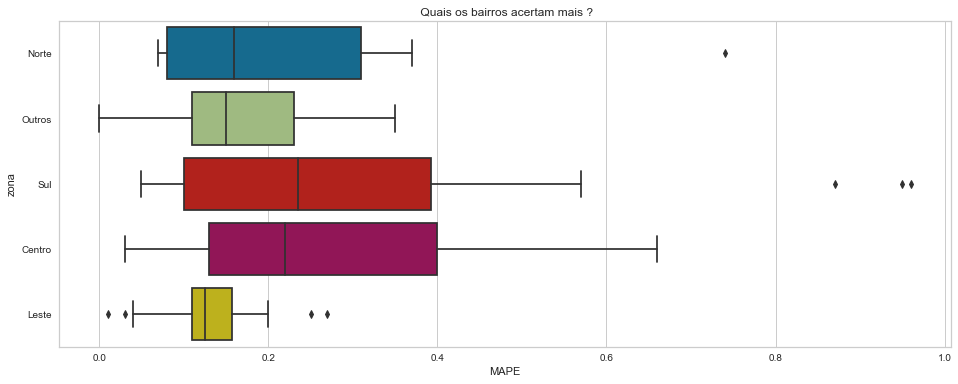

In [55]:
fig = plt.subplots(figsize = (16,6))

sns.boxplot(x= business_cenarios_b.MAPE ,y = business_cenarios_b.zona);
plt.title(" Quais os bairros acertam mais ?" );


*** Como vimos da EDA, a Zona Leste é a que tem mais dados, 
e sua performance comprovou ser melhor que as outras zonas ***
- Melhorias: coletar dados com nr mais equalitário entre os bairros 

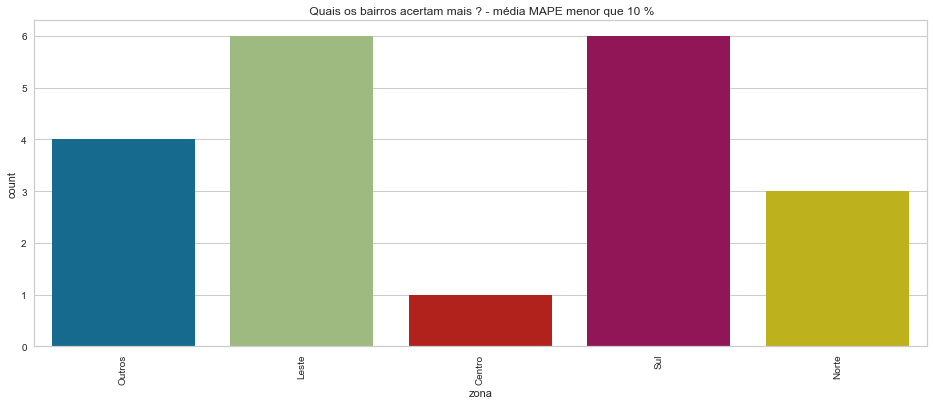

In [56]:
fig = plt.subplots(figsize = (16,6))
sns.countplot(x ='zona',data = menos_10 );
plt.title(" Quais os bairros acertam mais ? - média MAPE menor que 10 %")
plt.xticks(rotation=90);

In [57]:
mais_25 = business_cenarios_b.sort_values('MAPE', ascending= False)
mais_25[mais_25.MAPE > 0.25]

,Bairro,predictions,MAE,MAPE,worst_scenario,best_scenario,zona
53,Santa Cruz,548615.00,268615.00,0.96,280000.00,817230.00,Sul
14,Esplanada,234335.00,114335.00,0.95,120000.00,348670.00,Sul
23,Lourival Parente,343751.50,162039.00,0.87,181712.50,505790.50,Sul
25,Memorare,268289.67,94989.67,0.74,173300.00,363279.34,Norte
43,Piçarra,307141.00,592859.00,0.66,-285718.00,900000.00,Centro
65,Tabuleta,611543.00,251185.00,0.57,360358.00,862728.00,Sul
57,Santo Antônio,211845.00,63369.00,0.40,148476.00,275214.00,Sul
6,Cabral,746777.00,288094.33,0.40,458682.67,1034871.33,Centro
8,Catarina,754813.00,204813.00,0.37,550000.00,959626.00,Sul
24,Mafuá,342975.00,92975.00,0.37,250000.00,435950.00,Norte


In [58]:
business_cenarios_b[business_cenarios_b.Bairro == 'Jóquei']

,Bairro,predictions,MAE,MAPE,worst_scenario,best_scenario,zona
22,Jóquei,1052049.42,182034.72,0.17,870014.7,1234084.14,Leste


## 10.2 Previsão unitária
- Como filtrar imóveis que atendam as necessidades de uma pessoa que deseja comprar para moradia?

In [376]:
X_test.head(1)

,Banheiros,Vagas,Bairro,preco_por_metro,QuartosporAreaConstruida,LogAreaConstruida,bairro_por_area
1032,2,2,26,-0.013968,0.308433,4.465908,0.148253


In [74]:
banheiros_prev_ = [2]
vagas_prev_ = [2]
bairro_prev = ['Recanto das Palmeiras']
prec_metro_find = a[a.Bairro == bairro_prev[0]]['preco_por_metro'].values[0]
preco_m2_prev_ = prec_metro_find
quartos_prev = 3
area_const_prev = 92
quartos_por_area_prev_ = quartos_prev/ area_const_prev
log_area_prev = np.log1p(area_const_prev)
categoria_prev = 'Apartamentos'
bairro_por_area_prev_ = round(categoria_e_bairro_por_area[categoria_e_bairro_por_area.Categoria == categoria_prev][categoria_e_bairro_por_area.Bairro == bairro_prev[0]]['Area construida'].values[0], 2) 



In [75]:
single_pred = pd.DataFrame()
single_pred['Banheiros'] = banheiros_prev_
single_pred['Vagas'] = vagas_prev_
single_pred['Bairro'] = bairro_prev_transf_
single_pred['preco_por_metro'] = preco_m2_prev_
single_pred['QuartosporAreaConstruida'] = quartos_por_area_prev_
single_pred['LogAreaConstruida'] = log_area_prev
single_pred['bairro_por_area'] = bairro_por_area_prev_

In [76]:
single_pred

,Banheiros,Vagas,Bairro,preco_por_metro,QuartosporAreaConstruida,LogAreaConstruida,bairro_por_area
0,2,2,Recanto das Palmeiras,4100.009526,0.032609,4.532599,79.25


In [62]:
rmodel_rf_tunned.predict( np.expm1(single_pred ) )

array([12.78549054])

# ML Performance

In [145]:
df4['error'] = df4['Preço'] - df4['predictions']
df4['error_rate'] = df4['predictions'] / df4['Preço']

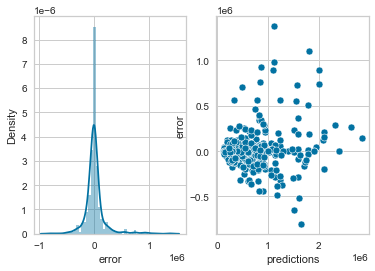

In [146]:
plt.subplot( 1, 2, 1 )
sns.distplot( df4['error'] );

plt.subplot( 1, 2, 2 )

sns.scatterplot( df4['predictions'], df4['error'] );

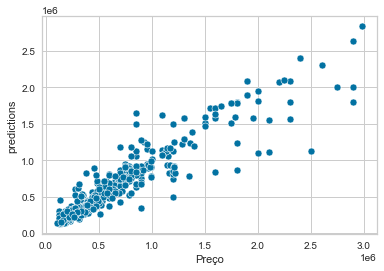

In [147]:

sns.scatterplot( x = 'Preço', y= 'predictions' ,data=df4 );



In [ ]:
X_grid = np.arange(min(df4.Preço), max(df4.Preço), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(df4.Preço, df4.predictions, color = 'red')
plt.plot( X_grid, color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()